#  [MATH2319] Course Project - Group 68



###  Tushar Kondvilkar (s3800119)

###  M. Abdullah Anis (s3790720)

###  Brian Steven Rathod (s3760875)



# 1. Introduction

When banks give out loans to customers they need to know whether a customer is good credit risk or bad. So the banks do not want to give loan to any customer who is not able to return the loans. Subsequently, they want to give loans to customers who will successfully pay back the loans.

We have selected a dataset on German Credit Data prepared by Prof. Hoffman which has been imported from the UCI website. The dataset we have chosen propese a classification problem. This dataset contains 1000 rows & 20 attributes. Each row in the dataset represents a customer who has taken credit from the bank. All the potential customers are classified as good or bad credit risk based on many parameters such as credit history. The original dataset has been referenced below. The target feature is 'risk' which contains 2 classes 'Good' or 'Bad' which are represented by 1 & 0 respectively. The target feature classifies whether the customer has good credit risk or bad credit risk.

UCI Machine Learning Repository: Statlog (German Credit Data) Data Set. Archive.ics.uci.edu. (2020). Retrieved 31 May 2020, from https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29.

## 1.1 Objective

The objective of the study is to use various machine learning algorithms in order to find the best model which can classify a customer as good or bad credit risk based on the set of attributes in the dataset.

## 1.2 Predictive modelling Methodology

Following are the binary classifiers we considered for classifiying the target feature:
1. KNN
2. Decision Tree
3. Naive Bayes
4. Random Forest
5. Logistic Regression

First we checked for missing values, encoded categorical features, encoded the target feature and scaled the descriptive features. After that, we split the full dataset to training & test sets with 75:25 ratio. Training dataset contains 750 rows & test dataset has 250 rows.
Next, we performed feature selection using the powerful Random Forest Importance method inside a pipeline. We selected 15 best features for modelling our data. We set the hyparameter values for all the algorithms & assessed their performance using the training data. Our performance metric was AUC score & we built each model with parallel processing set to -2 cores.
We found the tuned classifiers with best hyparameter values using Grid Search. Upon finding the 5 tuned classifiers we fit them on the test data with 10-fold cross validation & performed paired t-tests to check whether any performance difference is statistically significant. Finally we compared classifiers with respect to different scoring metrics such as recall to see which classifier would perform the best.

# 2. Data - Preprocessing

We will be importing all the required librarys below.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import io
import requests
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot as plt
import seaborn as sns
#! pip install dython
from dython.nominal import associations

#!pip install --upgrade altair
#!pip install vega vega_datasets

## 2.1 Reading Data

In [2]:
pd.set_option('display.max_columns', None) 

attributeNames = ['checking_account',
'duration',
'credit history',
'purpose',
'credit amount',
'savings account',
'employment status',
'rate',
'status_sex',
'debt',
'residence',
'property',
'age',
'other installment plans',
'housing',
'existing credits',
'job',
'liability',
'telephone',
'foreign worker',
'risk']

df = pd.read_csv("s3800119_Data.csv", 
                   sep = ',', 
                   names = attributeNames)


There were no ID like columns in the dataset.

In [3]:
df.head(5)

,checking_account,duration,credit history,purpose,credit amount,savings account,employment status,rate,status_sex,debt,residence,property,age,other installment plans,housing,existing credits,job,liability,telephone,foreign worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
print(df.shape)

(1000, 21)


## 2.2 Types of variable

In [5]:
 df.dtypes

checking_account           object
duration                    int64
credit history             object
purpose                    object
credit amount               int64
savings account            object
employment status          object
rate                        int64
status_sex                 object
debt                       object
residence                   int64
property                   object
age                         int64
other installment plans    object
housing                    object
existing credits            int64
job                        object
liability                   int64
telephone                  object
foreign worker             object
risk                        int64
dtype: object

## 2.3 Checking for Missing Values & Unique values

In [6]:
df.isna().sum()

checking_account           0
duration                   0
credit history             0
purpose                    0
credit amount              0
savings account            0
employment status          0
rate                       0
status_sex                 0
debt                       0
residence                  0
property                   0
age                        0
other installment plans    0
housing                    0
existing credits           0
job                        0
liability                  0
telephone                  0
foreign worker             0
risk                       0
dtype: int64

In [7]:
print(df.nunique())

checking_account             4
duration                    33
credit history               5
purpose                     10
credit amount              921
savings account              5
employment status            5
rate                         4
status_sex                   4
debt                         3
residence                    4
property                     4
age                         53
other installment plans      3
housing                      3
existing credits             4
job                          4
liability                    2
telephone                    2
foreign worker               2
risk                         2
dtype: int64


## 2.4 Converting categorical and numerical columns to relevant data types

In [8]:
cat_cols = ['status_sex', 'job', 'housing', 'savings account','checking_account','purpose', 'risk']
num_cols = [ 'credit amount', 'duration']

df[cat_cols] = df[cat_cols].astype(np.object)
df[num_cols] = df[num_cols].astype(np.number)

## 2.5 Inserting proper categories to columns

In [9]:
df["checking_account"].replace({"A11": "0 DM", "A12": "0 - 200 DM", "A13": ">200 DM", "A14": "No Checking account"}, inplace=True)

df["credit history"].replace({"A30": "no creds taken", "A31": "all creds paid back", "A32": "existing creds paid back", "A33": "delay in paying",
                              "A34": "critical account"}, inplace=True)

df["purpose"].replace({"A40": "new car", "A41": "used car", "A42": "furniture", "A43": "radio/tv","A44": "domestic applicances","A45": "repairs", 
                       "A46": "education", "A47": "vacation", "A48": "retraining", "A49": "business", "A410": "others",}, inplace=True)

df["savings account"].replace({"A61": "<100 DM", "A62": "100 - 500 DM", "A63": "500 - 1000 DM", "A64": ">1000 DM","A65": "No savings account"}, inplace=True)

df["employment status"].replace({"A71": "Unemployed", "A72": "<1 year", "A73": "1 - 4 years", "A74": "4 - 7 years", "A75": ">7 years"}, inplace=True)

df["status_sex"].replace({"A91": "M/D", "A92": "F/D,M", "A93": "M/S", "A94": "M/M", "A95": "F/S"}, inplace=True)

df["debt"].replace({"A101": "no debt", "A102": "co-applicant", "A103": "guarantor"}, inplace=True)

df["property"].replace({"A121": "real estate", "A122": "life inusrance", "A123": "car", "A124": "no property"}, inplace=True)

df["other installment plans"].replace({"A141": "bank", "A142": "stores", "A143": "none"}, inplace=True)

df["housing"].replace({"A151": "rent", "A152": "own", "A153": "for free"}, inplace=True)

df["job"].replace({"A171": "unemployed", "A172": "unskilled", "A173": "skilled", "A174": "management"}, inplace=True)

df["telephone"].replace({"A191": "none", "A192": "yes"}, inplace=True)

df["foreign worker"].replace({"A201": "yes", "A202": "no"}, inplace=True)

df['risk'].replace({1: 'Good', 2: 'Bad'}, inplace= True)

## 2.6 Converting Age column to categorical variable

We converted the continuous age variable into 4 categories -

student = 18 to 25 years old 

young = 26 to 35 years old 

adults = 36 to 60 years old

Senior =  > 61 years old

In [10]:
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df['age'], interval, labels=cats)

#df = df.drop(columns = 'age') - performed after data visualisation

Converting remanining categorical columns to proper data type(object)

In [11]:

df["rate"] = df["rate"].astype(np.object)
df["residence"] = df["residence"].astype(np.object)
df["existing credits"] = df["existing credits"].astype(np.object)
df["liability"] = df["liability"].astype(np.object)
df["risk"] = df["risk"].astype(np.object)
df["Age_cat"] = df["Age_cat"].astype(np.object)

df.dtypes

checking_account            object
duration                   float64
credit history              object
purpose                     object
credit amount              float64
savings account             object
employment status           object
rate                        object
status_sex                  object
debt                        object
residence                   object
property                    object
age                          int64
other installment plans     object
housing                     object
existing credits            object
job                         object
liability                   object
telephone                   object
foreign worker              object
risk                        object
Age_cat                     object
dtype: object

## 2.7 Summary statistics

Summary statistics for numeric variables are given below:

In [12]:
df.describe()

,duration,credit amount,age
count,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000
std,12.058814,2822.736876,11.375469
min,4.000000,250.000000,19.000000
25%,12.000000,1365.500000,27.000000
50%,18.000000,2319.500000,33.000000
75%,24.000000,3972.250000,42.000000
max,72.000000,18424.000000,75.000000


Summary statistics for categorical variables are below:

In [13]:
df.describe(include = np.object) 

,checking_account,credit history,purpose,savings account,employment status,rate,status_sex,debt,residence,property,other installment plans,housing,existing credits,job,liability,telephone,foreign worker,risk,Age_cat
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,4,3,4,4,3,3,4,4,2,2,2,2,4
top,No Checking account,existing creds paid back,radio/tv,<100 DM,1 - 4 years,4,M/S,no debt,4,car,none,own,1,skilled,1,none,yes,Good,Young
freq,394,530,280,603,339,476,548,907,413,332,814,713,633,630,845,596,963,700,398


# 3. Data Visualization

## 3.1 Univariate Plots

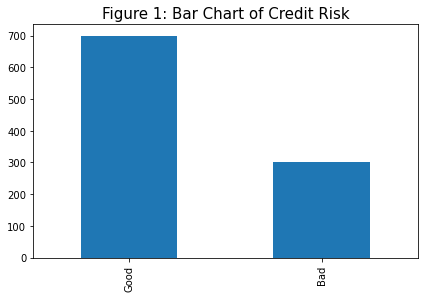

In [14]:
ax = df['risk'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Credit Risk', fontsize = 15)
plt.show();

We have 700 good credit customers & 300 bad credit customers.

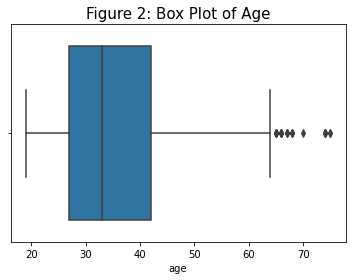

In [15]:
# get a box plot of age
sns.boxplot(df['age']).set_title('Figure 2: Box Plot of Age', fontsize = 15)
plt.show();

The mean age of people applying for credits is around 33 years.

Text(0.5, 1.0, 'Number of credits taken by Age category')

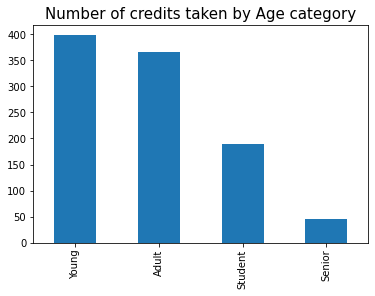

In [16]:
df['Age_cat'].value_counts().plot.bar().set_title("Number of credits taken by Age category", fontsize = 15)

The bar graph shows that applications for credit are mostly placed by young people.

Text(0.5, 1.0, 'Credit amount distribution')

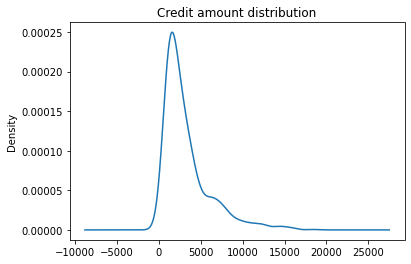

In [17]:
df['credit amount'].plot(kind='density').set_title("Credit amount distribution")

Most credit amount is given to customers is under 5000 Euros.

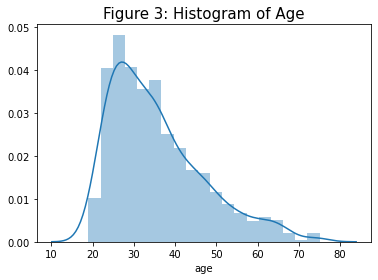

In [18]:
# histogram of age with kernel density estimate
sns.distplot(df['age'], kde = True).set_title('Figure 3: Histogram of Age', fontsize = 15)
plt.show();

## 3.2 Bivariate Plots

Text(0.5, 1.0, 'Credit amount based on Age category')

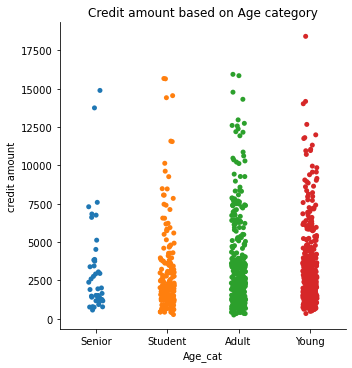

In [19]:
sns.catplot(x="Age_cat", y="credit amount", data=df)
plt.title("Credit amount based on Age category")


The scatter plot shows that most credit amount is taken by adults & young people. Seniors tend to take less credits amount from banks.

Text(0, 0.5, 'Loan duration(in months)')

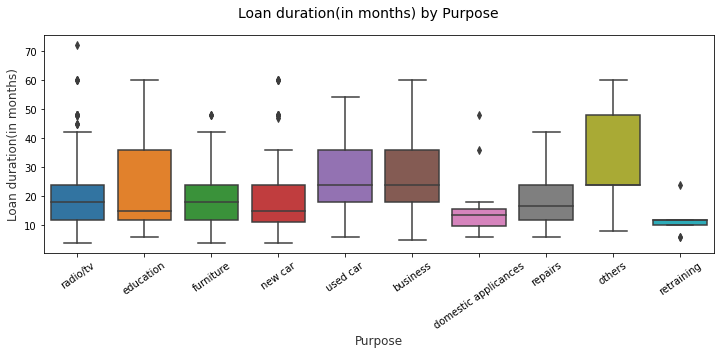

In [20]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Loan duration(in months) by Purpose', fontsize=14)

sns.boxplot(x="purpose", y="duration", data=df,  ax=ax)
ax.set_xlabel("Purpose",size = 12,alpha=0.8)
ax.tick_params(axis='x', labelrotation=35)
ax.set_ylabel("Loan duration(in months)",size = 12,alpha=0.8)

The graph above shows the boxplots of the purposes each client had for taking credit from the bank. We can see that most people get credit froma bank for education, cars and businesses.

Text(0.5, 1.0, 'Plot of credit amount w.r.t duration')

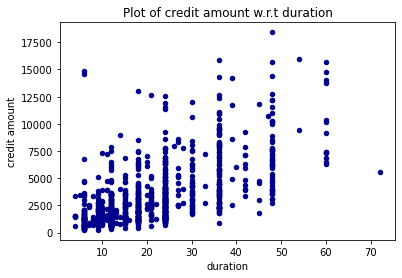

In [21]:
df.plot.scatter(x='duration',
                y='credit amount',
                c='DarkBlue').set_title("Plot of credit amount w.r.t duration")


## 3.3 Multivariate Plots

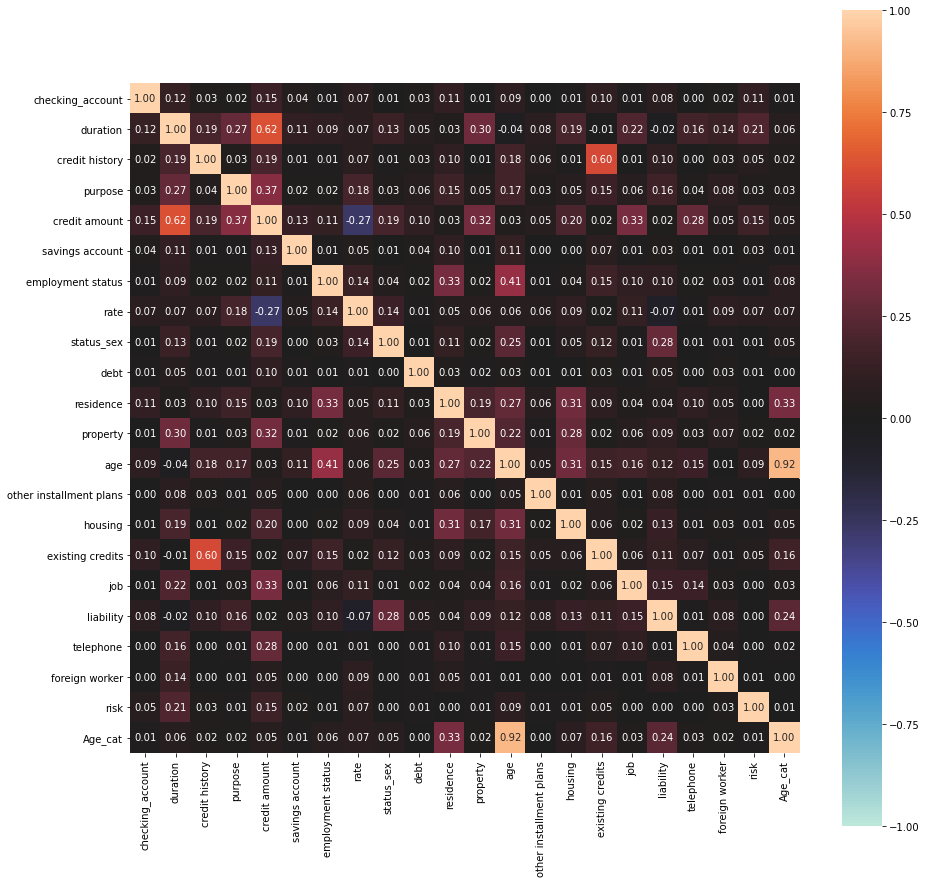

{'corr':                          checking_account  duration  credit history   purpose  \
 checking_account                 1.000000  0.118855        0.026139  0.018842   
 duration                         0.118855  1.000000        0.194654  0.273692   
 credit history                   0.024831  0.194654        1.000000  0.025614   
 purpose                          0.027883  0.273692        0.039900  1.000000   
 credit amount                    0.145556  0.624984        0.193283  0.370954   
 savings account                  0.037330  0.105586        0.009393  0.014289   
 employment status                0.011421  0.093996        0.017312  0.015998   
 rate                             0.074606  0.074749        0.072874  0.182953   
 status_sex                       0.005207  0.133419        0.011302  0.018441   
 debt                             0.009894  0.048387        0.009172  0.012432   
 residence                        0.108725  0.034067        0.098787  0.151836   
 propert

In [22]:
associations(df, theil_u=True, figsize=(15, 15))

The correlation matrix above shows the correlation between each attributes in the dataset.

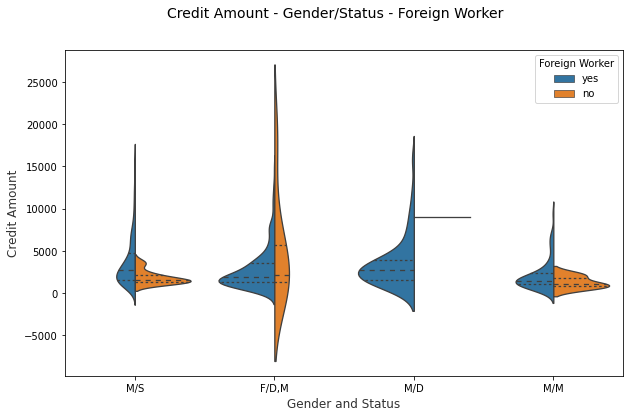

In [23]:
f, (ax2) = plt.subplots(1, 1, figsize=(10, 6))
f.suptitle('Credit Amount - Gender/Status - Foreign Worker', fontsize=14)

sns.violinplot(x="status_sex", y="credit amount", hue="foreign worker", 
               data=df, split=True, inner="quart", linewidth=1.3,
               ax=ax2)
ax2.set_xlabel("Gender and Status",size = 12,alpha=0.8)
ax2.set_ylabel("Credit Amount",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Foreign Worker')

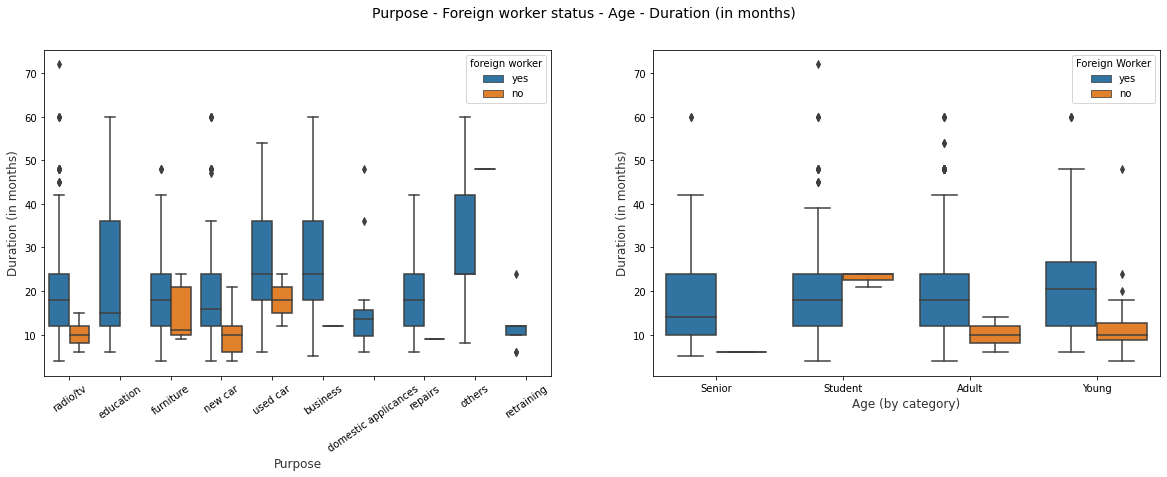

In [24]:
# Visualizing 3-D mix data using box plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.suptitle('Purpose - Foreign worker status - Age - Duration (in months)', fontsize=14)

sns.boxplot(x="purpose", y="duration", hue="foreign worker",
               data=df, ax=ax1)
ax1.set_xlabel("Purpose",size = 12,alpha=0.8)
ax1.tick_params(axis='x', labelrotation=35)
ax1.set_ylabel("Duration (in months)",size = 12,alpha=0.8)

sns.boxplot(x="Age_cat", y="duration", hue="foreign worker",
               data=df, ax=ax2)
ax2.set_xlabel("Age (by category)",size = 12,alpha=0.8)
ax2.set_ylabel("Duration (in months)",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Foreign Worker')


The above plot on the left show the distribution of foreign workers, their purposes of taking credit along with the duration of their credit.
The right plot shows the ditribution of foreign workers taking credit w.r.t their age category and  duration of credit.

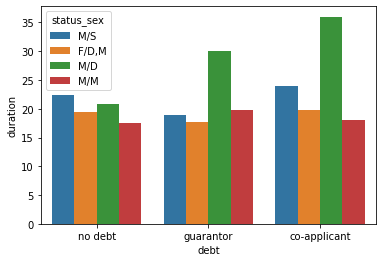

In [25]:
sns.barplot(x=df.debt, y=df.duration, hue=df.status_sex,ci=None)

the graph above shows the debt of each customer w.r.t to the duration of the credit they have taken from the bank. It highlights them based on their status and sex.


  Divorced males have the highest rates of debt as guarantors and co-applicants, compared to other gender/status demographics.
  On the other hand, females in general have lower rates of debt. While single males are likely to have no debt.


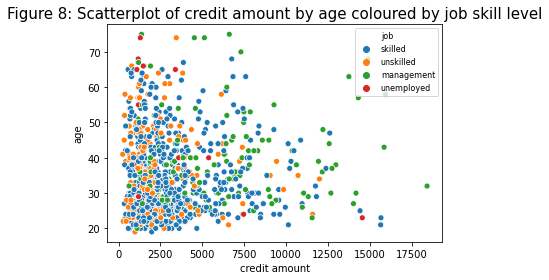

In [26]:
sns.scatterplot(df['credit amount'], df['age'], hue = df['job'])
plt.title('Figure 8: Scatterplot of credit amount by age coloured by job skill level', fontsize = 15);
plt.legend(loc = 'upper right',fontsize = 8)
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
plt.show();

We can see that skilled people (blue) and people working in management (green) take credits with most credit amount. Also most people under tha age of 65 take credits with amount under 5000 euros.

## 4 Encoding Variables

converting ordinal variables to category data type

In [27]:


df["checking_account"] = df["checking_account"].astype('category')
df["savings account"] = df["savings account"].astype('category')
df["employment status"] = df["employment status"].astype('category')
df["credit history"] = df["credit history"].astype('category')
df["property"] = df["property"].astype('category')
df["other installment plans"] = df["other installment plans"].astype('category')

#Dropping duplicate age column
df = df.drop(columns = 'age')

Label/integer encoding the ordinal variables

In [28]:


df["checking_account"] = df["checking_account"].cat.codes
df["savings account"] = df["savings account"].cat.codes
df["employment status"] = df["employment status"].cat.codes
df["credit history"] = df["credit history"].cat.codes
df["property"] = df["property"].cat.codes
df["other installment plans"] = df["other installment plans"].cat.codes


## 4.1 One-hot encoding (nominal) categorical variables

In [29]:


# get the list of categorical descriptive features
categorical_cols = df.columns[df.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(df[col].unique())
    if (n == 2):
        df[col] = pd.get_dummies(df[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
df = pd.get_dummies(df)

#### Target variable 'risk' is already integer-encoded in above step as 0 and 1. 0 is 'bad and 1 is 'good'.

In [30]:

data = df.drop(columns = 'risk').values

In [31]:
df.head()

,checking_account,duration,credit history,credit amount,savings account,employment status,rate,residence,property,other installment plans,existing credits,liability,telephone,foreign worker,risk,purpose_business,purpose_domestic applicances,purpose_education,purpose_furniture,purpose_new car,purpose_others,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,"status_sex_F/D,M",status_sex_M/D,status_sex_M/M,status_sex_M/S,debt_co-applicant,debt_guarantor,debt_no debt,housing_for free,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,Age_cat_Adult,Age_cat_Senior,Age_cat_Student,Age_cat_Young
0,1,6.0,1,1169.0,4,3,4,4,3,1,2,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,0,48.0,3,5951.0,2,0,2,2,3,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,3,12.0,1,2096.0,2,1,2,3,3,1,1,2,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0
3,1,42.0,3,7882.0,2,1,2,4,1,1,1,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
4,1,24.0,2,4870.0,2,0,3,4,2,1,2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0


In [32]:
fdf1 = df.drop(columns = 'risk')

fdf1.head()

,checking_account,duration,credit history,credit amount,savings account,employment status,rate,residence,property,other installment plans,existing credits,liability,telephone,foreign worker,purpose_business,purpose_domestic applicances,purpose_education,purpose_furniture,purpose_new car,purpose_others,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,"status_sex_F/D,M",status_sex_M/D,status_sex_M/M,status_sex_M/S,debt_co-applicant,debt_guarantor,debt_no debt,housing_for free,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,Age_cat_Adult,Age_cat_Senior,Age_cat_Student,Age_cat_Young
0,1,6.0,1,1169.0,4,3,4,4,3,1,2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,0,48.0,3,5951.0,2,0,2,2,3,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,3,12.0,1,2096.0,2,1,2,3,3,1,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0
3,1,42.0,3,7882.0,2,1,2,4,1,1,1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
4,1,24.0,2,4870.0,2,0,3,4,2,1,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0


## 5. Predictive Modelling

## 5.1 Feature Selection

We perform feature selection using the powerful random forest importance method inside a pipeline.

In [33]:
from sklearn.ensemble import RandomForestClassifier

num_features = 15
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(fdf1, df['risk'])
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = fdf1.columns[fs_indices_rfi].values
best_features_rfi

array(['credit amount', 'checking_account', 'duration', 'credit history',
       'employment status', 'savings account', 'rate', 'property',
       'residence', 'other installment plans', 'existing credits',
       'purpose_new car', 'telephone', 'Age_cat_Adult', 'Age_cat_Student'],
      dtype=object)

In [34]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.12193198, 0.10995192, 0.09525185, 0.05323096, 0.04708966,
       0.04312938, 0.04172415, 0.04130079, 0.04116145, 0.02941617,
       0.02359884, 0.02085985, 0.01976263, 0.01851494, 0.01836634])

In [35]:
df_imp = pd.DataFrame({'features': best_features_rfi, 
                       'importances': feature_importances_rfi})

df_imp

,features,importances
0,credit amount,0.121932
1,checking_account,0.109952
2,duration,0.095252
3,credit history,0.053231
4,employment status,0.047090
5,savings account,0.043129
6,rate,0.041724
7,property,0.041301
8,residence,0.041161
9,other installment plans,0.029416


The above table shows the 15 features we selected along with their importance. Credit amount is the highest as this makes sense as the risk of giving credit is correlated with the amount of the credit given.

In [36]:
features_df = df[['credit amount', 'checking_account', 'duration', 'credit history',
       'employment status', 'savings account', 'property', 'rate',
       'residence', 'other installment plans', 'existing credits',
       'purpose_new car', 'housing_own', 'Age_cat_Student',
       'status_sex_M/S','risk']].copy()

features_df.head(5)


,credit amount,checking_account,duration,credit history,employment status,savings account,property,rate,residence,other installment plans,existing credits,purpose_new car,housing_own,Age_cat_Student,status_sex_M/S,risk
0,1169.0,1,6.0,1,3,4,3,4,4,1,2,0,1,0,1,1
1,5951.0,0,48.0,3,0,2,3,2,2,1,1,0,1,1,0,0
2,2096.0,3,12.0,1,1,2,3,2,3,1,1,0,1,0,1,1
3,7882.0,1,42.0,3,1,2,1,2,4,1,1,0,0,0,1,1
4,4870.0,1,24.0,2,0,2,2,3,4,1,2,1,0,0,1,0


## 5.2 Train test splitting and data sampling

We split the full dataset to training & test sets with 75:25 ratio. Training dataset contains 750 rows & test dataset has 250 rows.

In [37]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Setting Data and Target variables for modeling and Spliting X and y into train and test versions.

In [38]:

X = features_df.drop('risk', 1).values
y = features_df["risk"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Now, we plot the boxplots for each models according to the scoring metric 'accuracy'. These models are not tuned right now.

LR: 0.721333 (0.032904)
KNN: 0.665333 (0.052137)
DT: 0.645333 (0.056944)
NB: 0.726667 (0.059703)
RF: 0.741333 (0.056944)


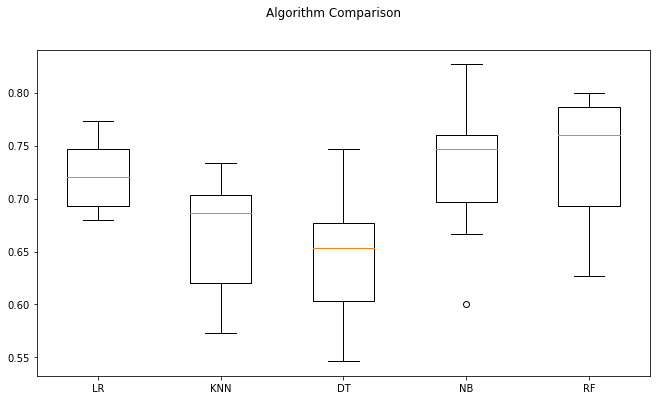

In [39]:
# to feed the random state
seed = 999

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above diagram, we can see that LR, NB and RF are performing relatively good in terms of accuracy.

##### Model Evaluation Strategy

We will train and tune our models on 750 rows of training data and test them on 250 rows of testing data. we will be employing stratified K fold method to perform cross-validation on the data with number of splits = 5.

In [40]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

## 6 Hyper parameter tuning

### 6.1 KNN tuning

Using Pipeline, we stack feature selection and grid search for KNN hyperparameter tuning via cross-validation. We will use the same Pipeline methodology for NB, DT, RF and LR.

The hyperparameters for KNN  are as follows:

number of neighbors (n_neighbors)

number of features (n_features)

the distance metric p.

Feature selection was done using the powerful Random Forest Importance (RFI) method with 100 estimators. Using the help of a case study referenced at the end, we defined the custom function RFIFeatureSelector() class below to pass in RFI as a step to the pipeline.

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

Running our KNN classifier to find the best parameters for using grid search cross validation.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 15, df.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [43]:
gs_pipe_KNN.fit(X_train, y_train);


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed:    8.5s finished


In [44]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 10, 'knn__p': 1, 'rfi_fs__n_features_': 15}

We found the best parameters for KNN classifier to be:
    n_neighbours = 10,
    p = 1 and
    n_features = 15.

In [45]:
gs_pipe_KNN.best_score_

0.6058627966236662

The best score after cross validation for KNN classifier is 0.59. Let us check the results of other classifiers as this can be improved.

The following function formats grid search results as a pandas data frame so we can see the results for the 5 cross validations. This makes it easier for comparison of different parameter scores.

In [46]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [47]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
14,0.605863,0.037356,0.677048,0.566576,10.0,1.0,43.0
13,0.605863,0.037356,0.677048,0.566576,10.0,1.0,15.0
12,0.602301,0.031128,0.658131,0.565113,10.0,1.0,10.0
7,0.594641,0.045789,0.670046,0.538519,5.0,1.0,15.0
8,0.594641,0.045789,0.670046,0.538519,5.0,1.0,43.0


We can see above that the cross-validated AUC score difference for different hyper parameters is not much. Visualization is shown below.

In [48]:
import altair as alt

results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

## 6.2 (Gaussian) Naive Bayes (NB) tuning

As NB requires every descriptive feature to follow a Gaussian distribution, we performed a power transformation on the input data before fitting the model. We will optomize var_smoothing parameter for NB.

feature selection was done using RFIFeatureSelector() function.

In [49]:
from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(X_train)

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 15,features_df.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 10
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_sample_train_transformed , y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    2.3s finished


In [51]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 15, 'nb__var_smoothing': 0.008406652885618326}

We found the best parameters for NB to be: n_fetaures  = 15 and var_smoothing = 0.0028995

In [52]:
gs_pipe_NB.best_score_


0.755267319636885

Best score by NB with auc score is 0.74 which is much better than KNN classifier. We shall test more classifiers to see if there is any better one.

In [53]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
5,0.755267,0.039687,0.803386,0.688042,15.0,0.008407
6,0.755184,0.039796,0.803598,0.687831,15.0,0.012751
0,0.754849,0.039277,0.802540,0.688677,16.0,0.038720
1,0.754679,0.038824,0.801270,0.689101,15.0,0.067475
8,0.754548,0.039405,0.800847,0.687196,15.0,0.128989


We can see above that the cross-validated AUC score difference for different hyper parameters for NB is small. Visualization is shown below.

In [54]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

## 6.3 Decision Trees (DT) tuning
The hyper parameters for DT are:

maximum depth (max_depth)

minimum sample split (min_samples_split)

number of features (n_features).

In [55]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=999))])

params_pipe_DT = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:    3.2s finished


In [56]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 100, 'rfi_fs__n_features_': 10}

best parameters for Decision tree classifier are:
'dt__max_depth': 10, 'dt__min_samples_split': 150, 'rfi_fs__n_features_': 10

In [57]:
gs_pipe_DT.best_score_

0.723002318132753

Deicision Tree classifier after Cross validation with AUC scoring metric gives the best score of 0.718 which is better than KNN but does not beat NB classifier accuracy. We will continue to check for more classifiers. Visulaization of DT classifier is shown below.

In [58]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

In [59]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
2,0.723002,0.046445,0.773829,0.656773,5.0,100.0,10.0
3,0.721941,0.051555,0.781587,0.647513,5.0,150.0,10.0
11,0.721786,0.043396,0.775293,0.647513,15.0,150.0,10.0
7,0.721665,0.047234,0.766827,0.647513,10.0,150.0,10.0
10,0.715158,0.029999,0.742684,0.676735,15.0,100.0,10.0


## 6.4 Random Forest tuning

The Hyper parameters for Random forest are:

max_depth

number of estimators (n_estimators)

max_features

n_features

As before, we will use RFI to select features and perform grid search cross validation to find the best parameters for the decision tree classifier.

In [60]:


pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', RandomForestClassifier( random_state=999))])

params_pipe_RF = {'rf__max_depth': [3,5, 7, 10, None],
              'rf__n_estimators':[3,5,10,25,50,150],
              'rf__max_features': [4,7,15],
                 'rfi_fs__n_features_': [15]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_RF.fit(X_train, y_train);

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-2)]: Done 450 out of 450 | elapsed:   38.2s finished


In [61]:
gs_pipe_RF.best_params_

{'rf__max_depth': 7,
 'rf__max_features': 4,
 'rf__n_estimators': 25,
 'rfi_fs__n_features_': 15}

best parameters for random forest classifier are :  
 'max_depth': 10,
 'max_features': 4,
 'n_estimators': 50,
 'n_features_': 15

In [62]:
gs_pipe_RF.best_score_

0.767479375696767

#### RF classifier after Cross validation with AUC scoring metric gives the best score of 0.769 which is better than all classifiers tested before.
Visualization of  Random forest classifier with best parameters is shown below.

In [63]:
results_RF = get_search_results(gs_pipe_DT)

results_RF_10_features = results_DT[results_RF['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_RF_10_features, 
          title='RF Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

### 6.5 Logistic Regression tuning

Hyper paramter for Logistic regression is C which is the inverse of regularization strength.

We performed Grid search cross validation to find the best paramters for Logistic regression.

In [64]:
LR = GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),scoring='roc_auc',
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [65]:
LR.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [66]:
LR.best_params_

{'C': 1}

The best parameter for LR is c = 0.1. 

In [67]:
LR.best_score_

0.7400041230910797

We found the best score for LR to be 0.72 which is better than KNN but fails to beat random forest in terms of accuracy with AUC scoring metric

## 7. Performance Comparison between Models

Before, we found the hyper parameters for our classifiers using 750 rows of training data using cross validation. In order for us to really compare their performance, we will use the best parameters of each classifier (tuned) to predict using 250 rows of Test data which is unseen data for the classifiers. The scoring metric will be AUC. We will perform 10 splits and use the mean of the results for each split to determine the accuracy of each classifier on the Test data. The seed value for each classifier is same ie 999.

Finally, we will perform paired t-test on the results of each classifier to compare whether the differences are statistically significant. The comparison of each tuned classifier will be with every other tuned classifier being tested.

Let see usee the KNN model performance using cross validation.

In [68]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=X_test,
                                 y=y_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.5840219421101775

Mean result for KNN performance on test data is 0.597 which is not that good.

NB model performance using cross validation:

In [69]:
Data_sample_test_transformed = PowerTransformer().fit_transform(X_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.7383053221288515

Mean result for NB performance on test data is 0.718 which is better than KNN.

DT model performance using cross validation.

In [70]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.6898867880485527

Mean result for DT performance on test data is 0.665 which is better than KNN but not as good as NB.

Random forest model performance using cross validation.

In [71]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.7583800186741364

Mean result for RF performance on test data after Cross validation is 0.792 which is quite good and better than all previois.

Logistic Regression model performance using cross validation.

In [72]:
cv_results_LR = cross_val_score(estimator=LR.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_LR.mean()

0.7081115779645192

Mean result for LR performance on test data using CV is 0.709 which is not as good as that of RF.

#### Let us now go ahead and perform the paired t-test between all 5 classifiers to see which difference is statistically significant between them.

In [73]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print(stats.ttest_rel(cv_results_KNN, cv_results_LR))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_KNN, cv_results_LR))
print(stats.ttest_rel(cv_results_LR, cv_results_NB))
print(stats.ttest_rel(cv_results_RF, cv_results_LR))
print(stats.ttest_rel(cv_results_RF, cv_results_NB))


Ttest_relResult(statistic=-2.998988894044687, pvalue=0.014980906109027208)
Ttest_relResult(statistic=-5.33207061226557, pvalue=0.00047339118113614746)
Ttest_relResult(statistic=-2.5729596665155077, pvalue=0.030041580700790136)
Ttest_relResult(statistic=1.722479230397192, pvalue=0.11908177401206683)
Ttest_relResult(statistic=-1.5490495199633212, pvalue=0.1557788755863572)
Ttest_relResult(statistic=-1.7944038852668251, pvalue=0.10632797509584165)
Ttest_relResult(statistic=-2.5729596665155077, pvalue=0.030041580700790136)
Ttest_relResult(statistic=-2.4287634875370863, pvalue=0.038059664263175655)
Ttest_relResult(statistic=2.193439326265192, pvalue=0.055935751261338214)
Ttest_relResult(statistic=0.8587832980201, pvalue=0.4127475745833942)


From the results above, we can safely say that with a 95% significance level, Random forest classifier (RF) is statistically the best model in terms of AUC when compared to the test data. A p-value smaller than 0.05 indicates a statistically significant difference. 

Now we shall consider the following scoring metrics to evaluate models based on the test set:

Accuracy
Precision
Recall
F1 Score (the harmonic average of precision and recall)
Confusion Matrix
These metrics can be computed using classification_report from sklearn.metrics. The classification reports are shown below.

In [74]:
pred_KNN = gs_pipe_KNN.predict(X_test)

In [75]:
Data_test_transformed = PowerTransformer().fit_transform(X_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)

In [76]:
pred_DT = gs_pipe_DT.predict(X_test)

In [77]:
pred_RF = gs_pipe_RF.predict(X_test)

In [78]:
pred_LR = LR.predict(X_test)

In [79]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(y_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(y_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(y_test, pred_DT))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(y_test, pred_RF))
print("\nClassification report for Logistic Regression") 
print(metrics.classification_report(y_test, pred_LR))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.29      0.17      0.21        72
           1       0.71      0.84      0.77       178

    accuracy                           0.64       250
   macro avg       0.50      0.50      0.49       250
weighted avg       0.59      0.64      0.61       250


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.48      0.43      0.46        72
           1       0.78      0.81      0.80       178

    accuracy                           0.70       250
   macro avg       0.63      0.62      0.63       250
weighted avg       0.69      0.70      0.70       250


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.60      0.44      0.51        72
           1       0.80      0.88      0.84       178

    accuracy                           0.76       250
  

In [80]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(y_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(y_test, pred_RF))
print("\nConfusion matrix for Logistic Regression") 
print(metrics.confusion_matrix(y_test, pred_LR))


Confusion matrix for K-Nearest Neighbor
[[ 12  60]
 [ 29 149]]

Confusion matrix for Naive Bayes
[[ 31  41]
 [ 33 145]]

Confusion matrix for Decision Tree
[[ 32  40]
 [ 21 157]]

Confusion matrix for Random Forest
[[ 26  46]
 [ 11 167]]

Confusion matrix for Logistic Regression
[[ 25  47]
 [ 22 156]]


Looking at the Report, if the scoring metric used to classify a customer is Recall, then Decision Tree would give the best TPR values. This result is different from our statistical analysis as the scoring metric we used was AUC which showed that RF is the best classifier.
If we used F1 score as the scoring metric, we again would see that DT comes on top, closely followed by Random Forest classifier.

## 8. Limitations 

Firstly, we only selected 15 features from the final dataset, which we felt might be the reason why our classifiers did not perform splendidly. We could try increasing the limits in our feature selection. Also, the dataset was small and had only 750 rows for training. We could potentially gather more data so that the classifiers can be more optimized. Considering the size of the dataset, we are happy with the results.

Secondly, in the plots we saw that credit amount is correlated to credit worthiness i.e risk but in our feature selection analysis, the credit amount feature did not give outstanding correlational results with the target feature and we saw that credit amount does not always relate to credit worthiness. We for some reason got better results if we removed the credit amount feature but thought best to include it as it is directly relevant to the creditworthiness/ target feature.

Thirdly, we saw that Random forest classifier outperformed the other 4 classifiers. We can further fine tune and improve it by adding other other parameters available for the RF classifier. We could also expand its search space to get better results.

## 9. Summary 

We saw that the tuned Random Forest model produced the best AUC score after cross validation with 15 of the best features selected using RFI (Random Forest Importance). Furthermore, After evaluating the classifiers on the test data, we again saw RF as the best performer among all 5 classifiers and had the highest score w.r.t AUC. In terms of recall and F1 score however, we saw that Decision Tree yeilds the highest recall on the test data. In our analysis, We saw that more the number of features selected, better the results were for the tuned classifiers.

## 10. References

UCI Machine Learning Repository: Statlog (German Credit Data) Data Set. Archive.ics.uci.edu. (2020). Retrieved 31 May 2020, from https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29.

Vural Aksakalli, (2020). www.featureranking.com, Case Study: Predicting Income Status Available at:<https: #4="" case-study-predicting-income-status="" machine-learning-tutorials="" tutorials="" www.featureranking.com="">

Vural Aksakalli, (2020). www.featureranking.com, SK Part 0: Introduction to Machine Learning with Python and scikit-learn¶ Available at:<https: #4="" machine-learning-tutorials="" sk-part-0-introduction-to-machine-learning-with-python-and-scikit-learn="" tutorials="" www.featureranking.com="">

Vural Aksakalli, (2020). www.featureranking.com, SK Part 1: Basic Modeling Available at:<https: #4="" machine-learning-tutorials="" sk-part-1-basic-modeling="" tutorials="" www.featureranking.com="">

Vural Aksakalli, (2020). www.featureranking.com, SK Part 2: Feature Selection and Ranking Available at:<https: #4="" machine-learning-tutorials="" sk-part-2-feature-selection-and-ranking="" tutorials="" www.featureranking.com="">

Vural Aksakalli, (2020). www.featureranking.com, SK Part 3: Cross-Validation and Hyperparameter Tuning Available at:<https: #4="" machine-learning-tutorials="" sk-part-3-cross-validation-and-hyperparameter-tuning="" tutorials="" www.featureranking.com="">

Vural Aksakalli, (2020). www.featureranking.com, SK Part 3: Cross-Validation and Hyperparameter Tuning Available at:<https: #4="" machine-learning-tutorials="" sk-part-3-cross-validation-and-hyperparameter-tuning="" tutorials="" www.featureranking.com="">

Vural Aksakalli, (2020). www.featureranking.com, SK Part 4: Model Evaluation Available at:<https: #4="" machine-learning-tutorials="" sk-part-4-model-evaluation="" tutorials="" www.featureranking.com="">

Michael Waskom, (2020). seaborn.pydata.org, Plotting with categorical data Available at:<https: #4="" categorical.html="" seaborn.pydata.org="" tutorial="">

Shaked Zychlinski, (2020). github.com/shakedzy/dython,
Dython Available at:<http: #examples#4="" dython="" shakedzy.xyz="">

Stackoverflow. (2017). Using Pandas crosstab with seaborn stacked barplots. https://stackoverflow.com/questions/43544694/using-pandas-crosstab-with-seaborn-stacked-barplots&lt;/http:&gt;&lt;/https:&gt;&lt;/https:&gt;&lt;/https:&gt;&lt;/https:&gt;&lt;/https:&gt;&lt;/https:&gt;&lt;/https:&gt;&lt;/https:&gt;